In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Dense, Activation, Dropout, Flatten

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

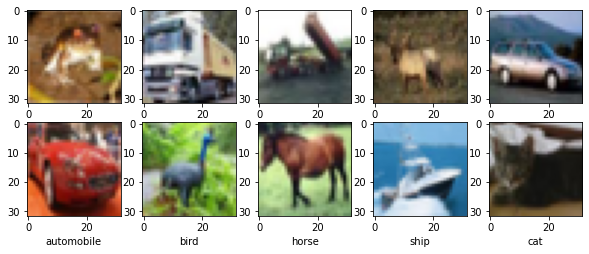

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5012 - accuracy: 0.4519 - val_loss: 1.2310 - val_accuracy: 0.5582
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1358 - accuracy: 0.5988 - val_loss: 1.0493 - val_accuracy: 0.6293
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9936 - accuracy: 0.6500 - val_loss: 0.9833 - val_accuracy: 0.6539
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9044 - accuracy: 0.6828 - val_loss: 0.9190 - val_accuracy: 0.6763
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8278 - accuracy: 0.7083 - val_loss: 0.8902 - val_accuracy: 0.6926
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7750 - accuracy: 0.7271 - val_loss: 0.8738 - val_accuracy: 0.7003
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7211 - accuracy: 0.7445 - val_loss: 0.8374 -

313/313 - 4s - loss: 0.8677 - accuracy: 0.7135


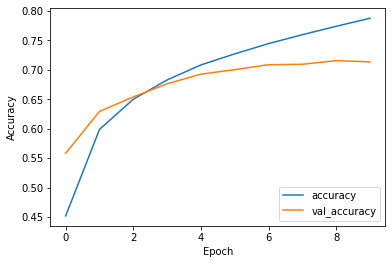

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

